# Emotion Detection - KDEF - K-Fold

Tester: Muhammad Aditya Bayhaqie

[Reference](https://paperswithcode.com/paper/facial-emotion-recognition-using-transfer)

## Library Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

2025-06-17 09:57:28.585163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750154248.784421      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750154248.844878      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Import Datasets

In [2]:
train_dir = '/kaggle/input/kdef-raf-fer-complete/Train'
test_dir ='/kaggle/input/kdef-raf-fer-complete/Val'

## Model 1
Dimension 64

### Data Engineering

In [3]:
dim = 64


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750154280.817820      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,263 (1.34 MB)

 Trainable params: 352,263 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [5]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1750154284.981059      71 service.cc:148] XLA service 0x7b6580005e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750154284.981880      71 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750154285.271835      71 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/146 ━━━━━━━━━━━━━━━━━━━━ 11:06 5s/step - accuracy: 0.0312 - loss: 2.0119

I0000 00:00:1750154287.167360      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


146/146 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.2380 - loss: 1.8715 - val_accuracy: 0.2782 - val_loss: 1.8370
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - accuracy: 0.2772 - loss: 1.8170 - val_accuracy: 0.2903 - val_loss: 1.7832
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.2911 - loss: 1.7975 - val_accuracy: 0.2863 - val_loss: 1.7872
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.2824 - loss: 1.7966 - val_accuracy: 0.3024 - val_loss: 1.7534
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.3036 - loss: 1.7589 - val_accuracy: 0.3387 - val_loss: 1.6743
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.3494 - loss: 1.7002 - val_accuracy: 0.4194 - val_loss: 1.6013
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - accuracy: 0.3621 - loss: 1.6716 - val_accuracy: 0.3387 - val_loss: 1.6614
Epoch 8/50
 76/146 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.3859 - loss: 1.6226

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.3872 - loss: 1.6264 - val_accuracy: 0.3589 - val_loss: 1.6620
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.3819 - loss: 1.6057 - val_accuracy: 0.3669 - val_loss: 1.5645
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.4121 - loss: 1.5791 - val_accuracy: 0.3831 - val_loss: 1.6025
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.4025 - loss: 1.5753 - val_accuracy: 0.3387 - val_loss: 1.7025
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.4208 - loss: 1.5396 - val_accuracy: 0.4234 - val_loss: 1.4848
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.4398 - loss: 1.5067 - val_accuracy: 0.4718 - val_loss: 1.4133
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.4293 - loss: 1.5073 - val_accuracy: 0.4597 - val_loss: 1.4751
Epoch 15/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.4344 - loss: 1.5071 - val_ac

#### Model Evaluation

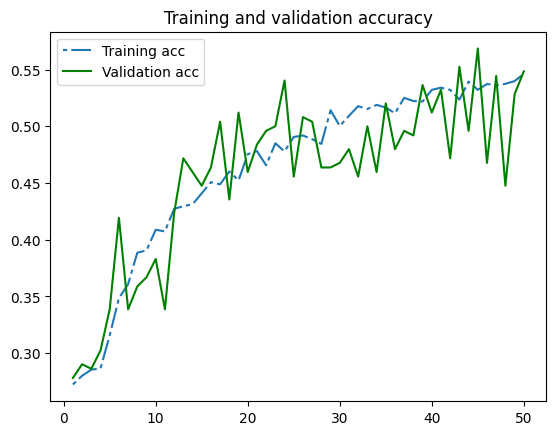

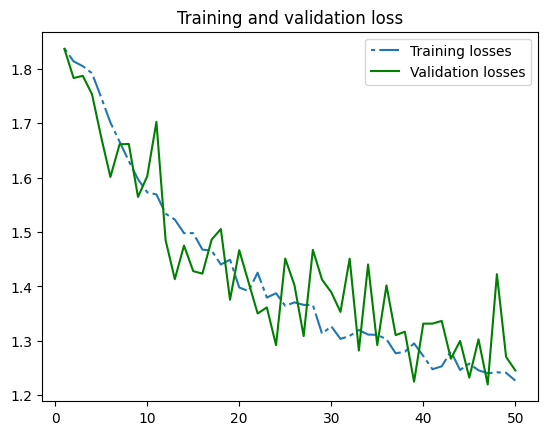

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 2
Dimension 350

### Data Engineering

In [7]:
dim = 350


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 348, 348, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 174, 174, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 172, 172, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 86, 86, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,450,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,508,039 (55.34 MB)

 Trainable params: 14,508,039 (55.34 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [9]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.2669 - loss: 1.8530 - val_accuracy: 0.2782 - val_loss: 1.7449
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.2988 - loss: 1.7620 - val_accuracy: 0.3750 - val_loss: 1.6556
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - accuracy: 0.3704 - loss: 1.6316 - val_accuracy: 0.3266 - val_loss: 1.6310
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - accuracy: 0.4200 - loss: 1.5425 - val_accuracy: 0.4395 - val_loss: 1.5440
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.4154 - loss: 1.5283 - val_accuracy: 0.3952 - val_loss: 1.5925
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.4270 - loss: 1.5075 - val_accuracy: 0.4839 - val_loss: 1.3834
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.4380 - loss: 1.4807 - val_accuracy: 0.3952 - val_loss: 1.5667
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.4506 - loss: 1.

#### Model Evaluation

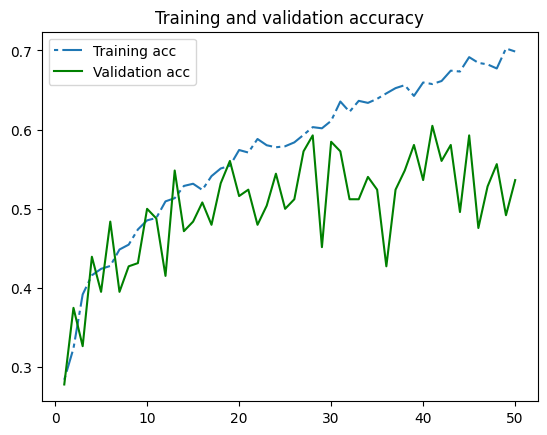

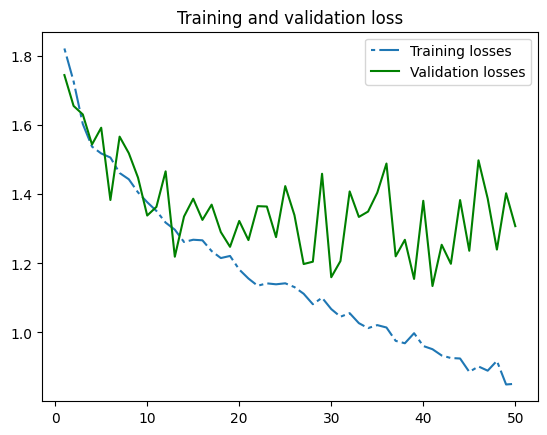

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3
Dimension 48

### Data Engineering

In [11]:
dim = 48


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,423 (736.03 KB)

 Trainable params: 188,423 (736.03 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [13]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.2667 - loss: 1.8597 - val_accuracy: 0.2863 - val_loss: 1.7996
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.2717 - loss: 1.8184 - val_accuracy: 0.3226 - val_loss: 1.7937
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.2814 - loss: 1.8106 - val_accuracy: 0.2661 - val_loss: 1.8262
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.2984 - loss: 1.8028 - val_accuracy: 0.3065 - val_loss: 1.7679
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.2820 - loss: 1.7887 - val_accuracy: 0.3145 - val_loss: 1.7437
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.2919 - loss: 1.7678 - val_accuracy: 0.3871 - val_loss: 1.7074
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3539 - loss: 1.7208 - val_accuracy: 0.3589 - val_loss: 1.6943
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3690 - loss: 1.6994 - val_acc

#### Model Evaluation

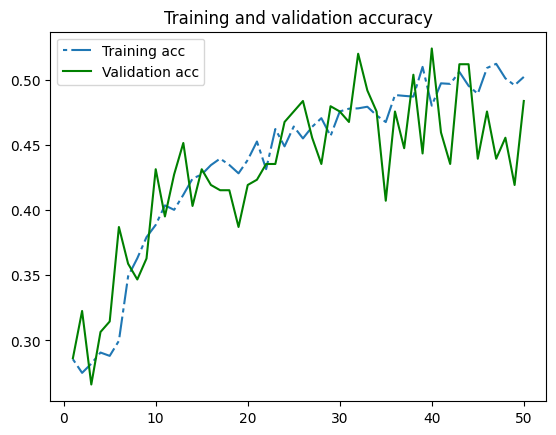

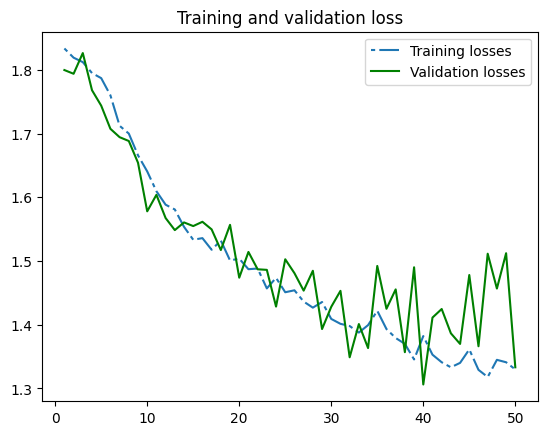

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 4
Dimension 224

### Data Engineering

In [15]:
dim = 224


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,595,143 (21.34 MB)

 Trainable params: 5,595,143 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [17]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.2839 - loss: 1.8364 - val_accuracy: 0.3226 - val_loss: 1.7688
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.2934 - loss: 1.7662 - val_accuracy: 0.3387 - val_loss: 1.6109
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.3727 - loss: 1.6176 - val_accuracy: 0.4718 - val_loss: 1.4639
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.3959 - loss: 1.5658 - val_accuracy: 0.4194 - val_loss: 1.5554
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.4235 - loss: 1.5300 - val_accuracy: 0.4556 - val_loss: 1.4779
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.4640 - loss: 1.4337 - val_accuracy: 0.4960 - val_loss: 1.3549
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.4593 - loss: 1.4458 - val_accuracy: 0.4597 - val_loss: 1.4450
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4824 - loss: 1.3820 - val_ac

#### Model Evaluation

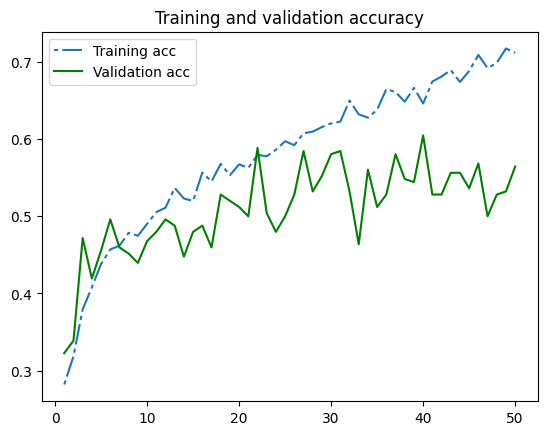

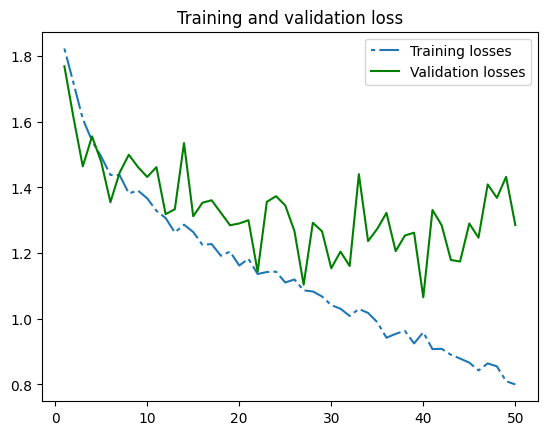

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 5
Dimension 128

### Data Engineering

In [19]:
dim = 128


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [20]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,662,983 (6.34 MB)

 Trainable params: 1,662,983 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [21]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.2771 - loss: 1.8299 - val_accuracy: 0.3427 - val_loss: 1.7865
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.2896 - loss: 1.7945 - val_accuracy: 0.3226 - val_loss: 1.7178
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3532 - loss: 1.6782 - val_accuracy: 0.3347 - val_loss: 1.6753
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3930 - loss: 1.5726 - val_accuracy: 0.3790 - val_loss: 1.5955
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.4148 - loss: 1.5373 - val_accuracy: 0.4597 - val_loss: 1.5025
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4153 - loss: 1.5217 - val_accuracy: 0.4315 - val_loss: 1.4461
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.4110 - loss: 1.5018 - val_accuracy: 0.4194 - val_loss: 1.4464
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4442 - loss: 1.4574 - val_acc

#### Model Evaluation

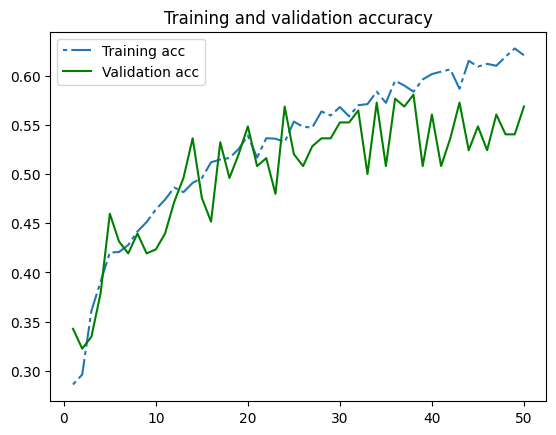

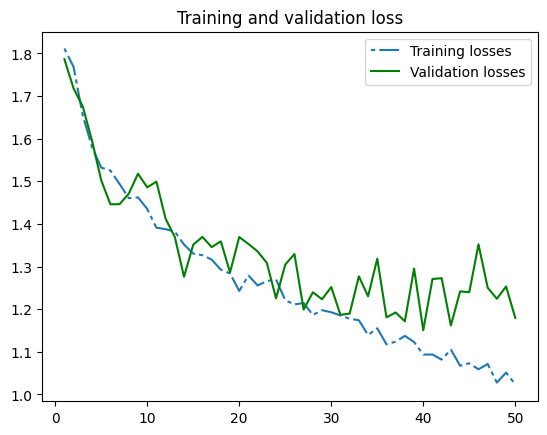

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()